# Import libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import joblib

# Load Dataset and Analyze

In [2]:
# load the dataset and display the first five rows
df = pd.read_csv("student_data_train.csv")

In [3]:
# Display summary statistics of the training dataset
print("Summary Statistics of Training Data")
print(df.describe())

Summary Statistics of Training Data
       Attendance (%)  Assignment Completion (%)  Test Score (10%)  \
count     5000.000000                5000.000000       5000.000000   
mean        68.771400                  68.954600          5.031000   
std         25.495457                  25.430106          3.179632   
min          0.000000                   0.000000          0.000000   
25%         63.000000                  63.000000          2.000000   
50%         75.000000                  75.000000          5.000000   
75%         87.000000                  87.000000          8.000000   
max         99.000000                  99.000000         10.000000   

       Practical Score (30%)  Exam Score (60%)  Total Score          Age  \
count            5000.000000        5000.00000  5000.000000  5000.000000   
mean               14.898200          29.78040    49.709600    21.457400   
std                 8.857038          17.60197    20.032731     2.295221   
min                 0.000000 

In [4]:
# Check for missing values in the training dataset
print("Checking for missing valuse in Training Data")
df.isnull().sum()

Checking for missing valuse in Training Data


Attendance (%)                             0
Assignment Completion (%)                  0
Test Score (10%)                           0
Practical Score (30%)                      0
Exam Score (60%)                           0
Total Score                                0
Performance                                0
Age                                        0
Gender                                     0
Marital Status                             0
Children (if Married)                      0
Mother Education                           0
Father Education                           0
Relationship with Student                  0
Extracurricular Activities                 0
Online Time (Daily)                        0
Family Relationship                        0
Free Time Activities                       0
Alcoholic Consumption                      0
Religious Programs (Weekly)                0
Computer/Laptop Access (for Practicals)    0
dtype: int64

# Data Preprocessing

In [5]:
# Convert categorical variables to numerical using Label Encoding
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [6]:
# split the data into features and target variable
X = df.drop('Performance', axis=1)
y = df['Performance']

In [22]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Creation and Training

In [8]:
# Create the decision tree classifier
clf = DecisionTreeClassifier()

In [9]:
# Train the model on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier()

# Model Prediction

In [10]:
# Make prediction on the test data
y_pred = clf.predict(X_test)

# Model Evaluation

In [11]:
# Calculate and print metrics 
print("Accuracy::", metrics.accuracy_score(y_test, y_pred))
print("Precision::", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall::", metrics.recall_score(y_test, y_pred, average='weighted'))
print("F1-Score::", metrics.f1_score(y_test, y_pred, average='weighted'))

Accuracy:: 1.0
Precision:: 1.0
Recall:: 1.0
F1-Score:: 1.0


In [12]:
# View classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       175
           1       1.00      1.00      1.00       156
           2       1.00      1.00      1.00       172
           3       1.00      1.00      1.00       157
           4       1.00      1.00      1.00       165
           5       1.00      1.00      1.00       175

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [13]:
# Save the trained model to a file
joblib.dump(clf, 'student_performance_predictor.joblib')

print("Model saved successfully.")

Model saved successfully.


# Calculate Feature Importance

In [14]:
importances = clf.feature_importances_
# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({'Feature' : X.columns, 'Importance' : importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)
print(feature_importances)

                                    Feature  Importance
5                               Total Score         1.0
0                            Attendance (%)         0.0
11                         Father Education         0.0
18              Religious Programs (Weekly)         0.0
17                    Alcoholic Consumption         0.0
16                     Free Time Activities         0.0
15                      Family Relationship         0.0
14                      Online Time (Daily)         0.0
13               Extracurricular Activities         0.0
12                Relationship with Student         0.0
10                         Mother Education         0.0
1                 Assignment Completion (%)         0.0
9                     Children (if Married)         0.0
8                            Marital Status         0.0
7                                    Gender         0.0
6                                       Age         0.0
4                          Exam Score (60%)     

# Visualizations

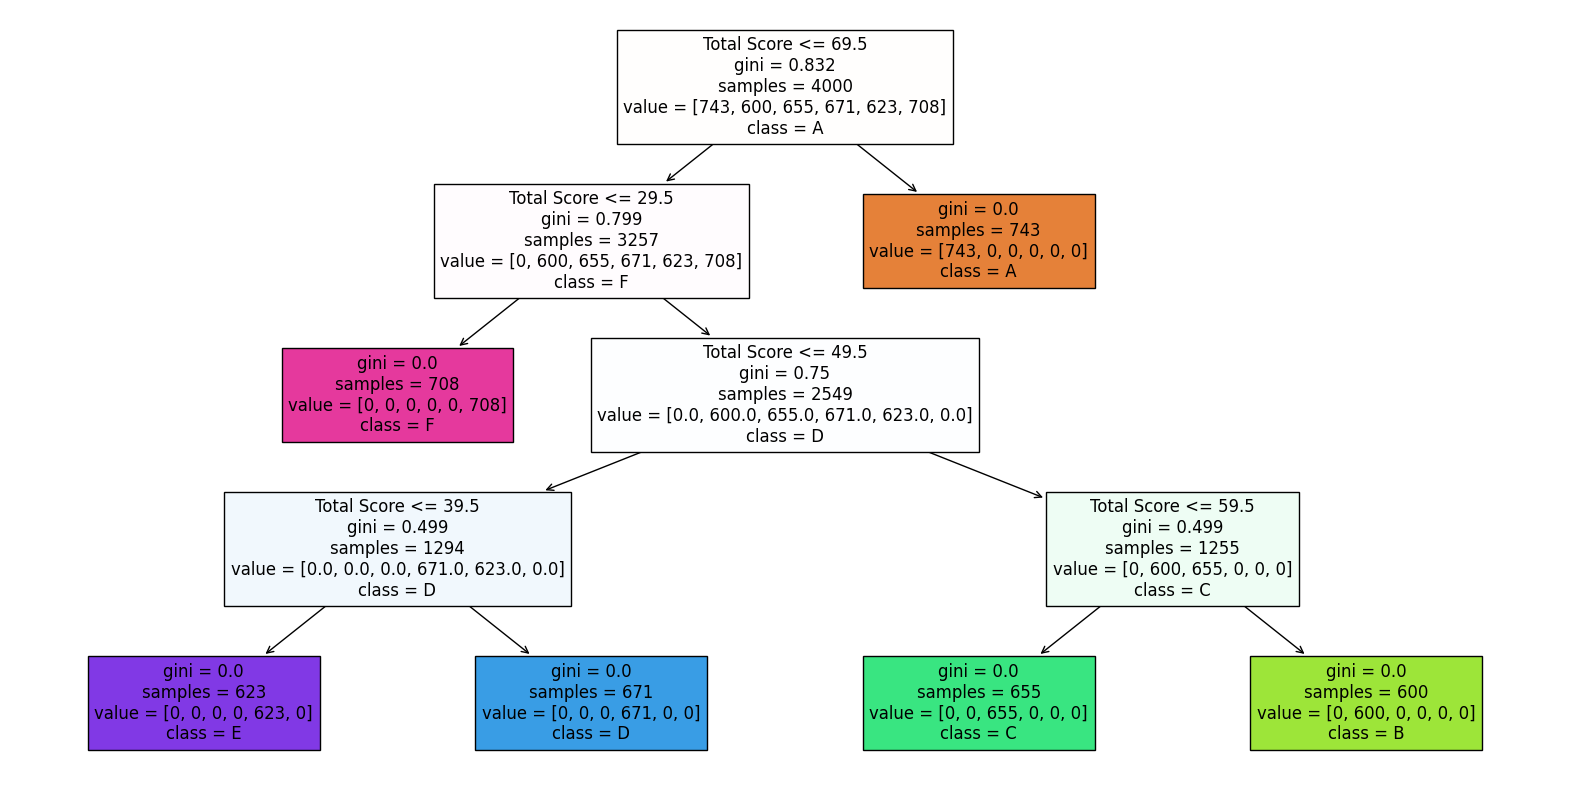

In [15]:
# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=label_encoders['Performance'].classes_)
plt.show()

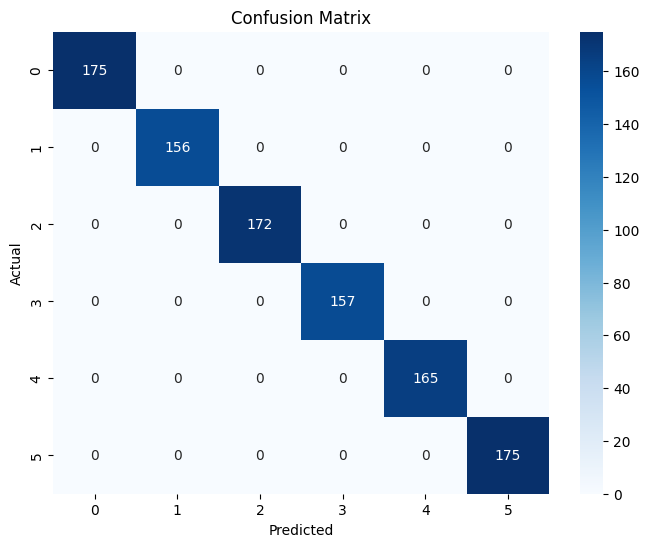

In [16]:
# Plot confusion matrix
plt.figure(figsize=(8, 6)) 
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues') 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.jpg', dpi=300)
plt.show() 

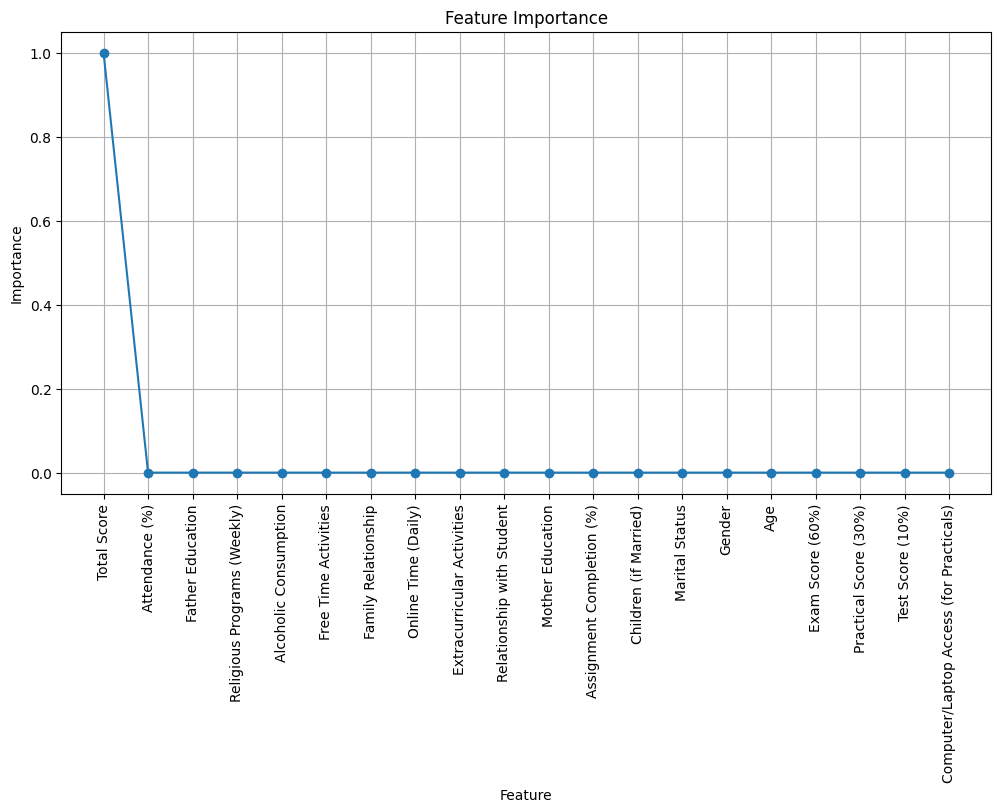

In [17]:
# Plot feature importances
plt.figure(figsize=(12, 6))
plt.plot(feature_importances['Feature'], feature_importances['Importance'], marker='o')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.savefig('feature_importance.jpg', dpi=300)
plt.show()

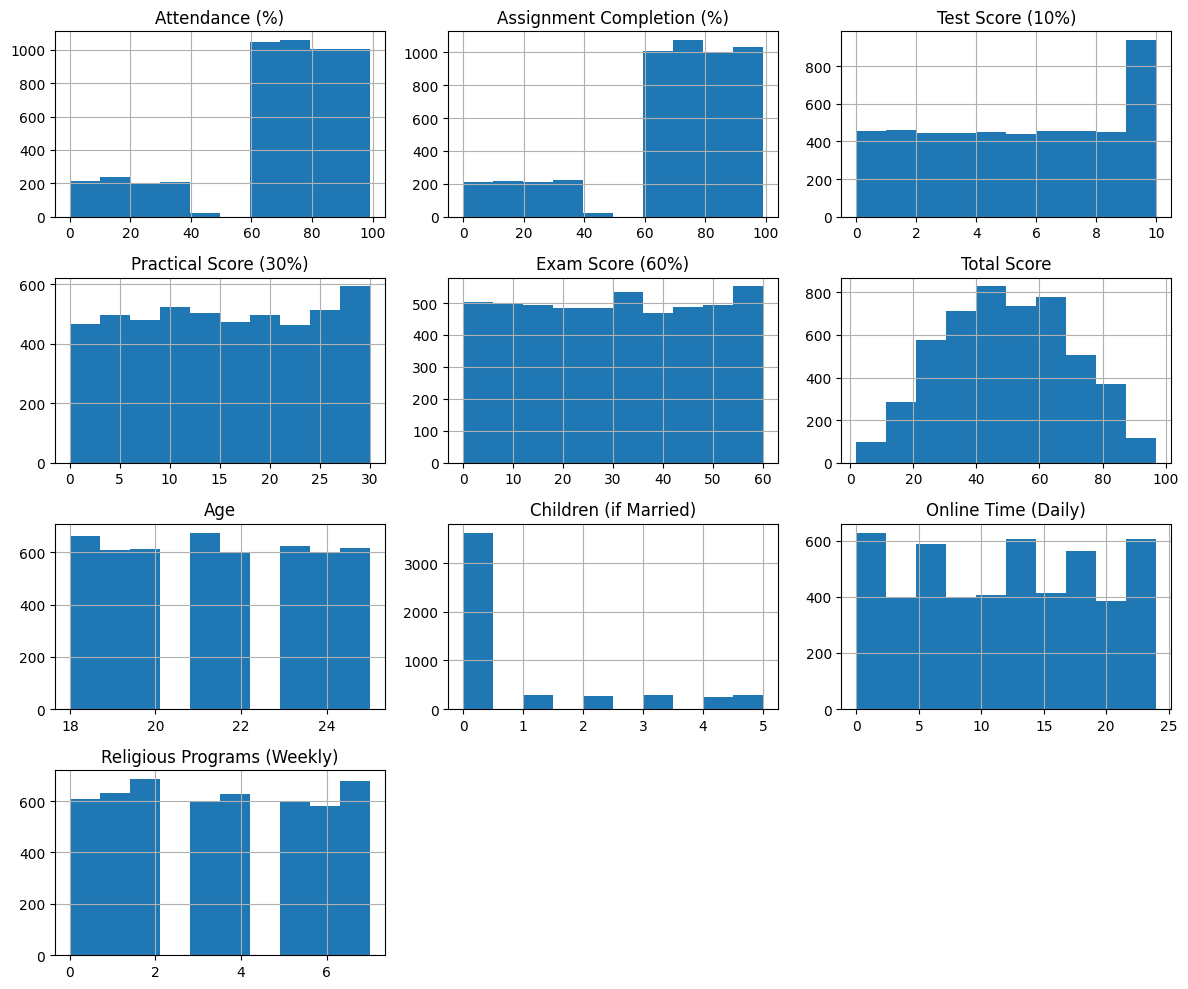

In [18]:
# Plot histograms for numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64'])
numerical_features.hist(figsize=(12, 10))
plt.tight_layout()
plt.savefig('feature_visualizations.jpg', dpi=300)
plt.show()

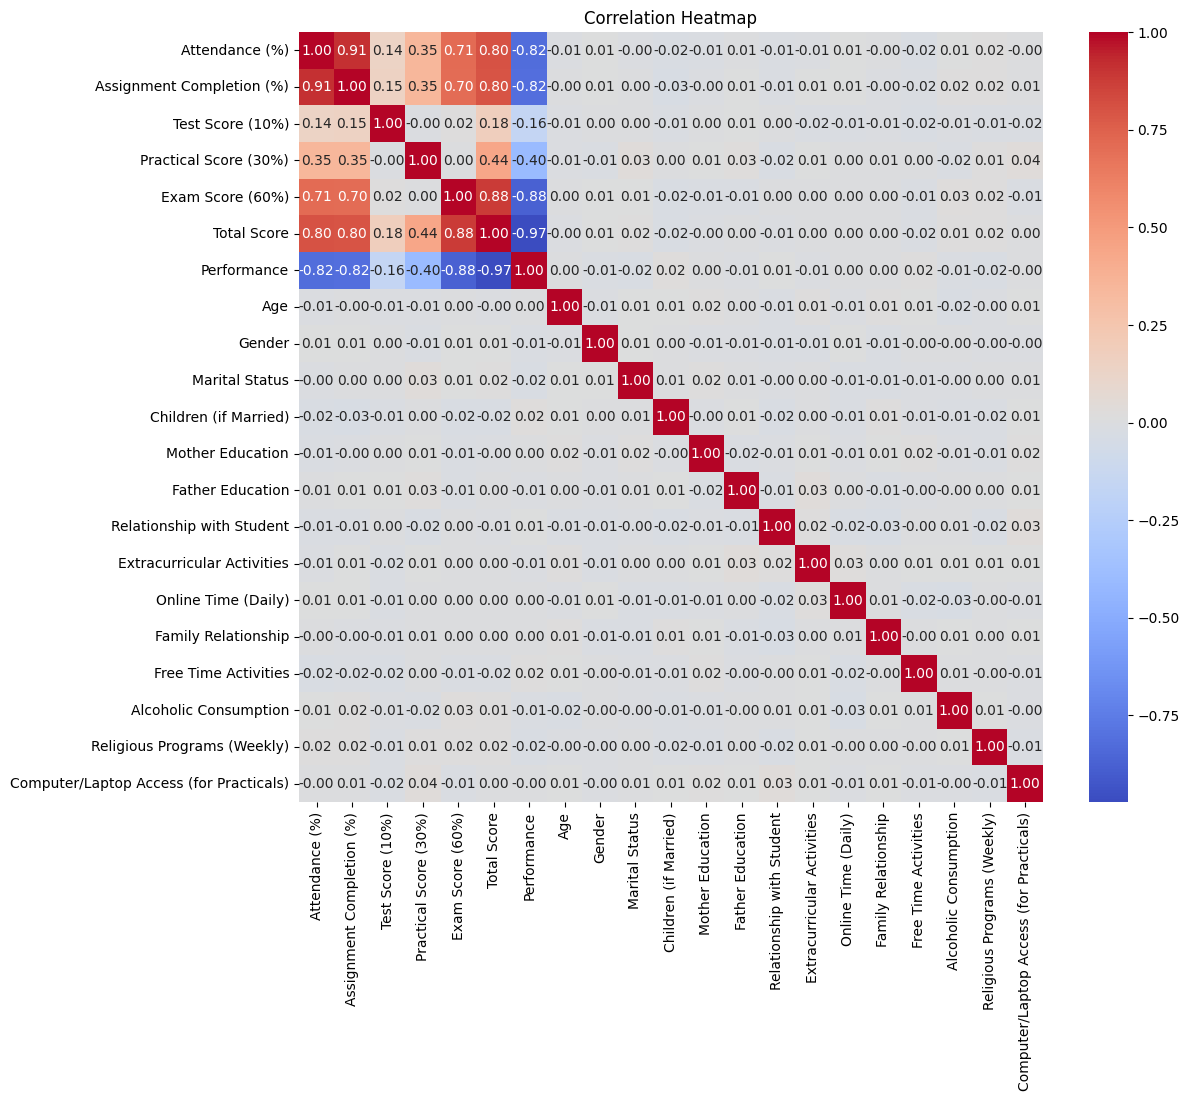

In [19]:
# Plot correlation matrix
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.jpg', dpi=300)
plt.show()

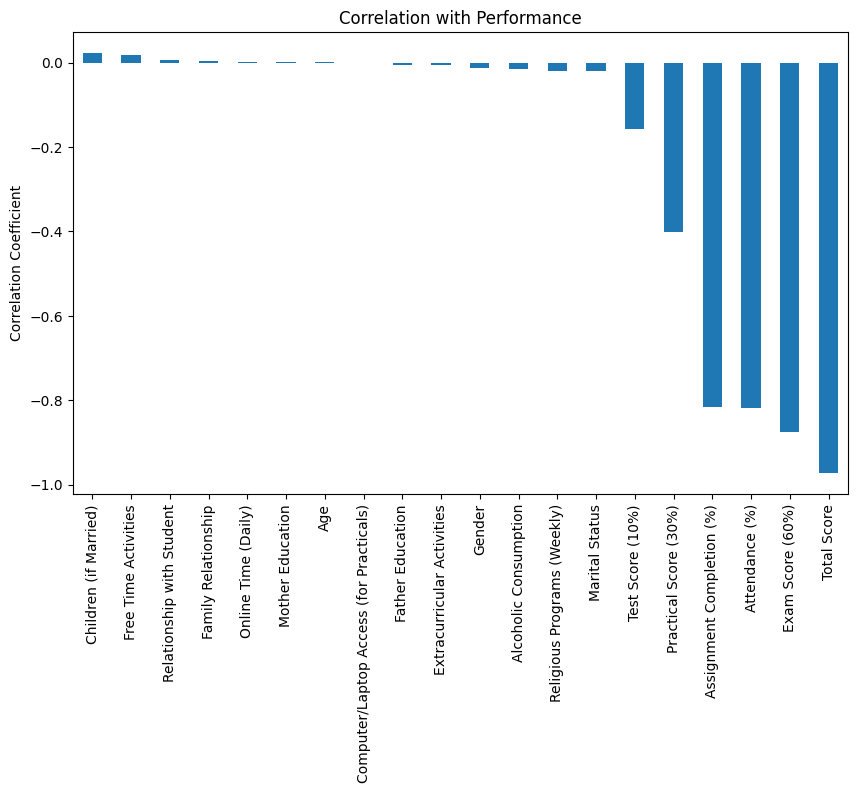

In [20]:
# Find correlations with Performance
correlations = df.corr()['Performance'].drop('Performance')
correlations = correlations.sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.title('Correlation with Performance')
plt.ylabel('Correlation Coefficient')
plt.savefig('feature_correlation.jpg', dpi=300)
plt.show()


# Test the Model

Accuracy on Test Data: 1.0
Precision on Test Data: 1.0
Recall on Test Data: 1.0
F1-Score on Test Data: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       963
           1       1.00      1.00      1.00       726
           2       1.00      1.00      1.00       812
           3       1.00      1.00      1.00       824
           4       1.00      1.00      1.00       808
           5       1.00      1.00      1.00       867

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



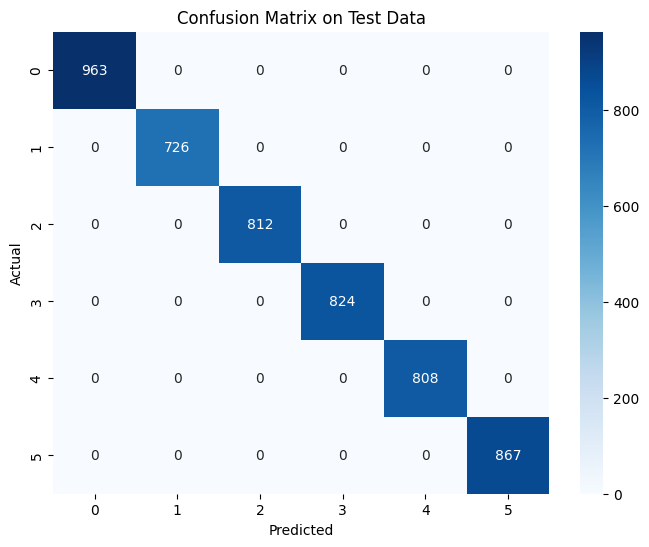

In [21]:
# Load the test dataset
df_test = pd.read_csv("student_data_test.csv")

# Apply label encoding to categorical variables
for column in df_test.select_dtypes(include=['object']).columns:
    df_test[column] = label_encoders[column].transform(df_test[column])

# Split the test dataset into features and target variable
X_test = df_test.drop('Performance', axis=1)
y_test = df_test['Performance']

# Make predictions on the test dataset
y_pred_test = clf.predict(X_test)

# Evaluate the model
print("Accuracy on Test Data:", metrics.accuracy_score(y_test, y_pred_test))
print("Precision on Test Data:", metrics.precision_score(y_test, y_pred_test, average='weighted'))
print("Recall on Test Data:", metrics.recall_score(y_test, y_pred_test, average='weighted'))
print("F1-Score on Test Data:", metrics.f1_score(y_test, y_pred_test, average='weighted'))
print(metrics.classification_report(y_test, y_pred_test))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Test Data')
plt.savefig('confusion_matrix_test.jpg', dpi=300)
plt.show()
